In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns
sns.set_context('poster',rc={"lines.linewidth":1})


/home/gjones/anaconda/envs/readout/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
import kid_readout.analysis.process_mmw_response

no data directory set up for clouds defaulting to /data


/home/gjones/anaconda/envs/readout/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [4]:
mmws = [kid_readout.analysis.process_mmw_response.MmwResponse('/artemis/readout/2016-02-20_103738_mmw_frequency_sweep.nc',k) for k in range(16)]

In [12]:
mmws.extend([kid_readout.analysis.process_mmw_response.MmwResponse('/artemis/readout/2016-02-20_111130_mmw_frequency_sweep.nc',k) for k in range(16)])

In [35]:
mmws_40nm = [kid_readout.analysis.process_mmw_response.MmwResponse('/artemis/readout/2016-01-09_231557_mmw_frequency_sweep.nc',k,data_is_aligned=True) for k in range(16)]

In [50]:
plot_dir = '/artemis/readout/plots/2016-02-23-jpl-2015-10-park-40nm-al-nb-gp/'

/home/gjones/anaconda/envs/readout/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


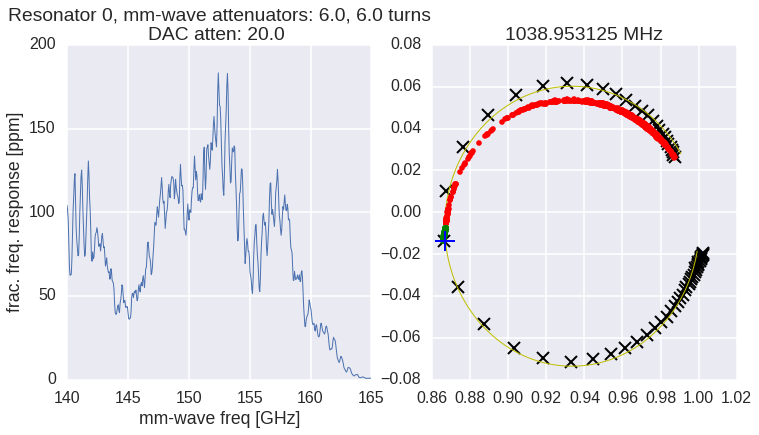

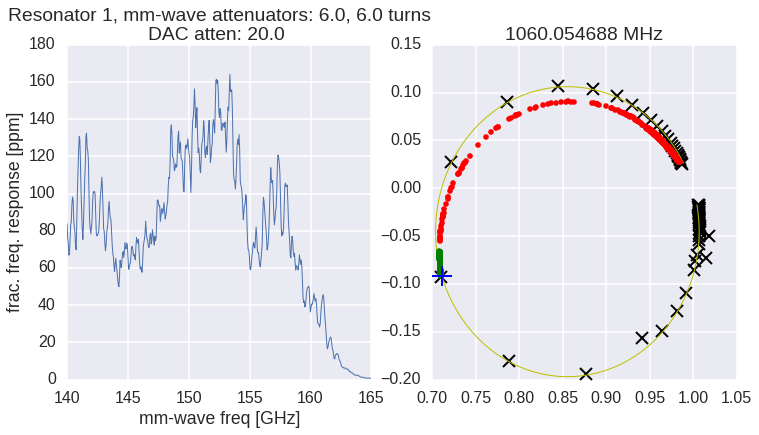

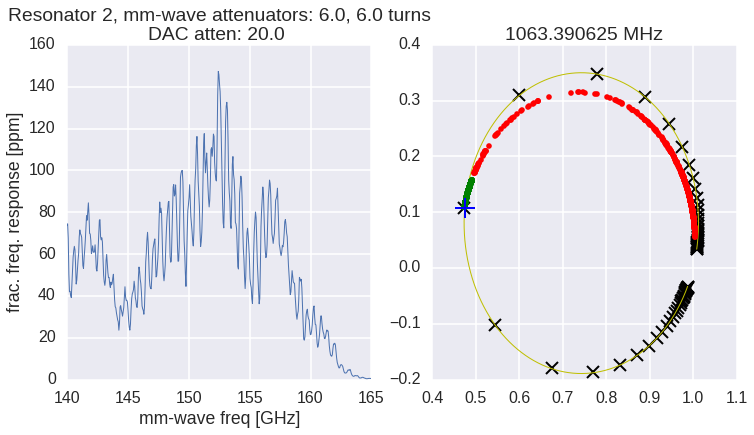

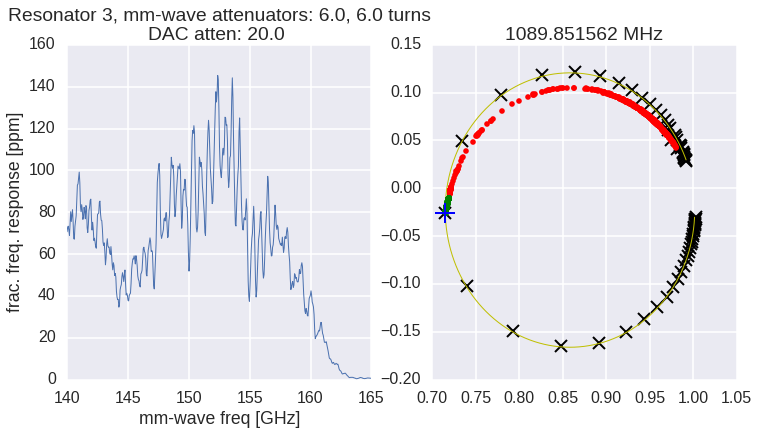

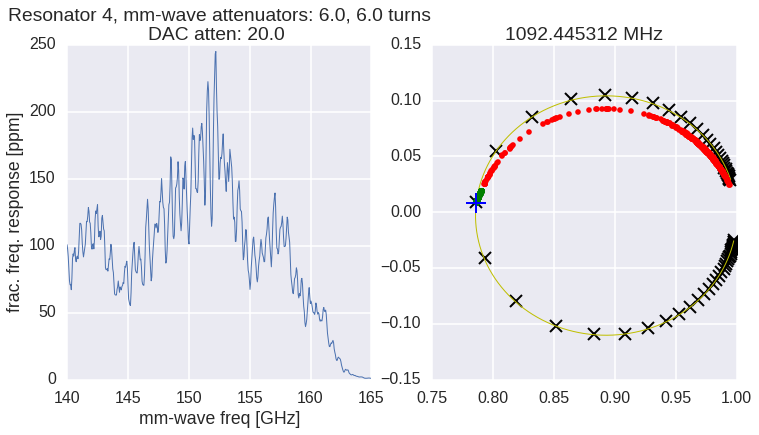

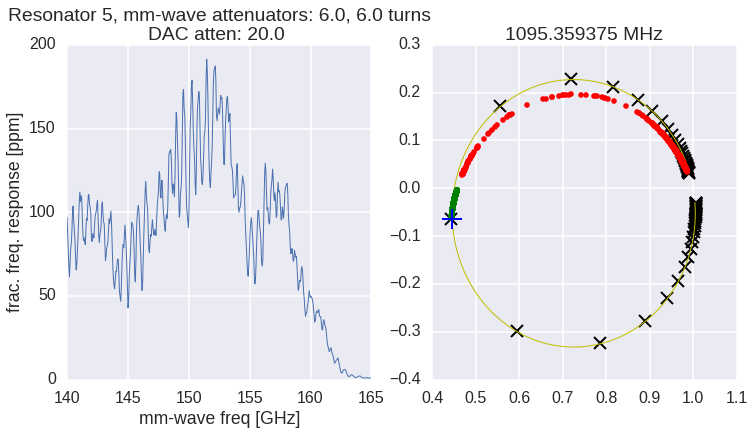

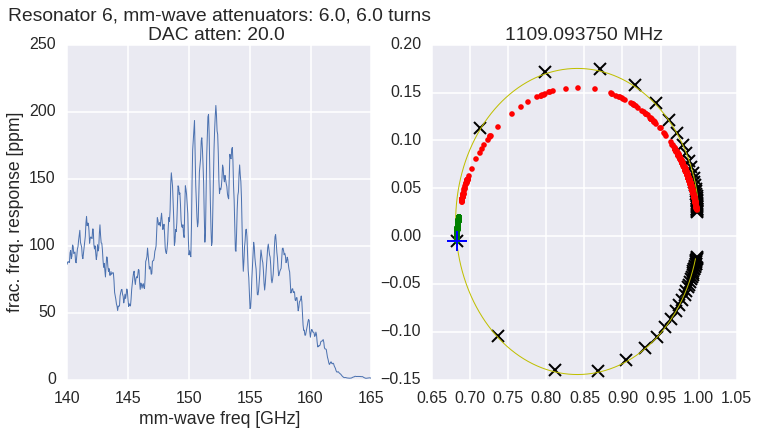

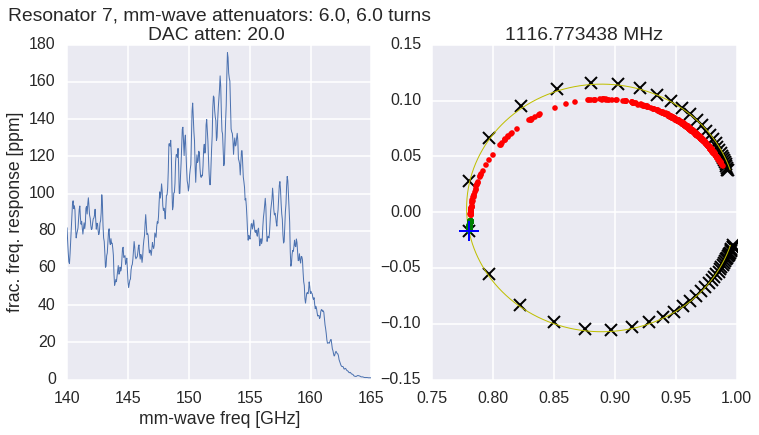

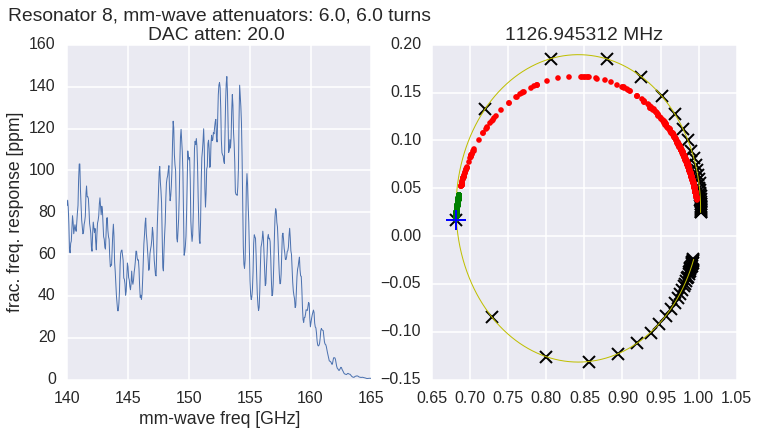

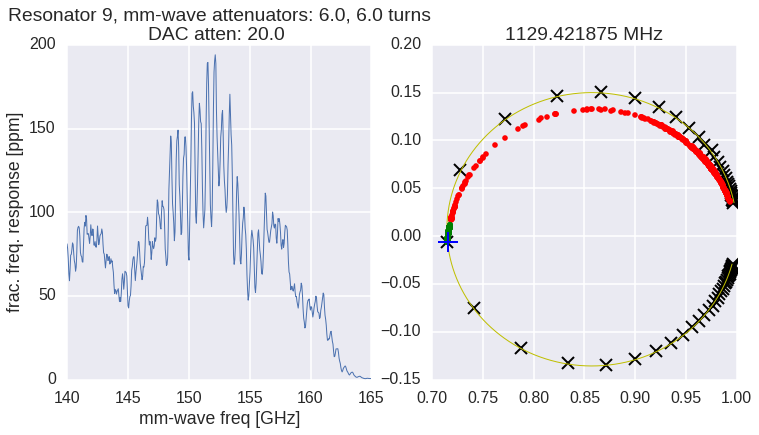

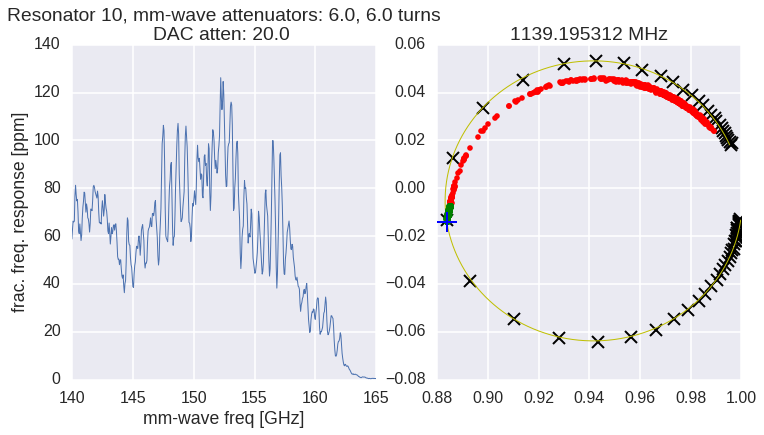

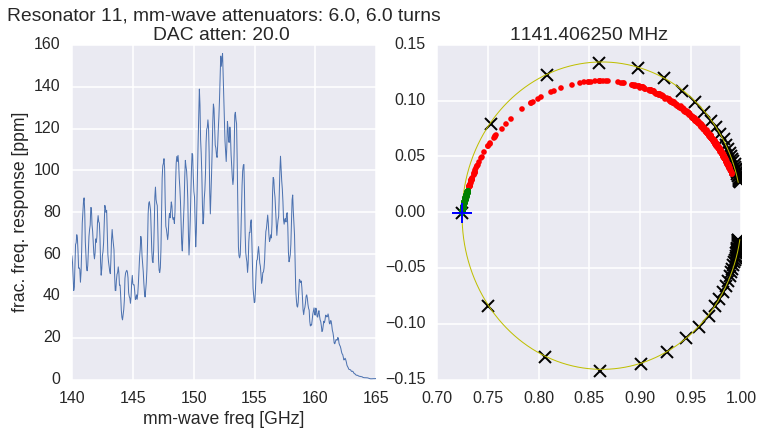

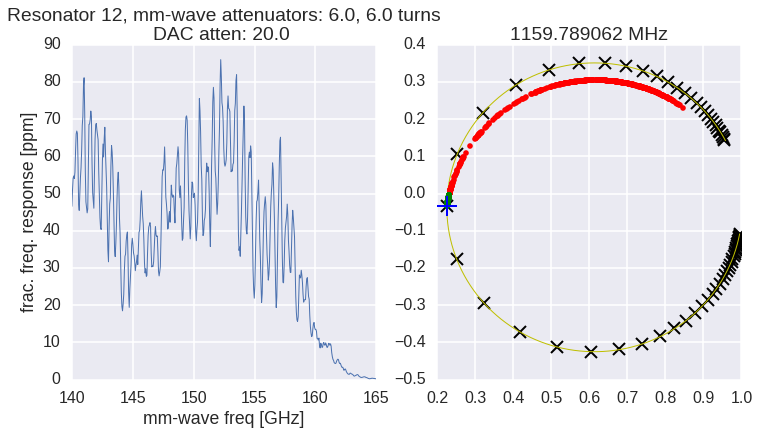

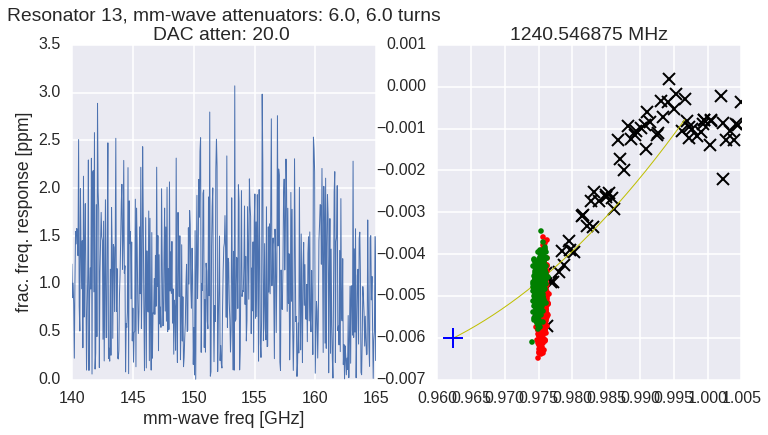

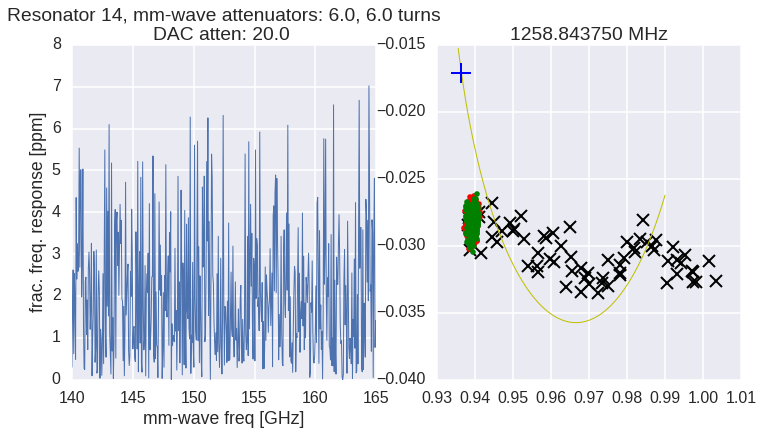

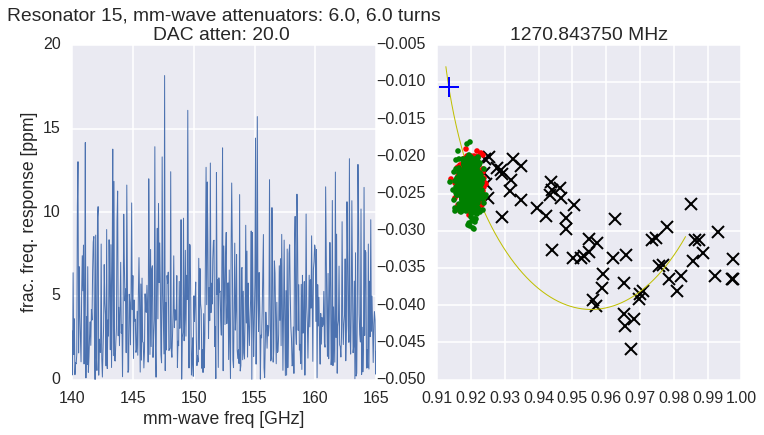

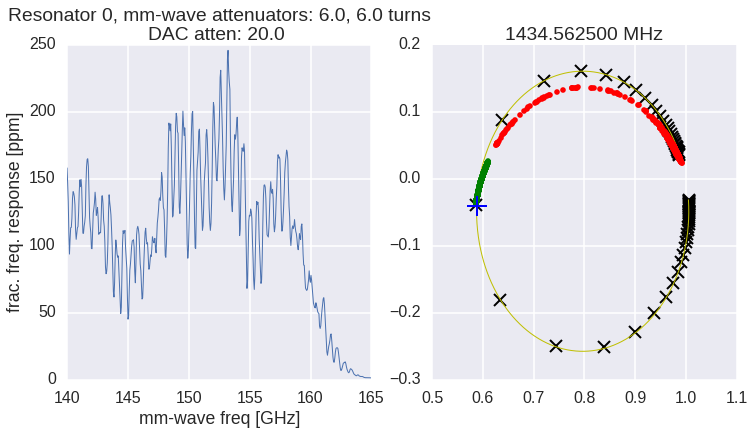

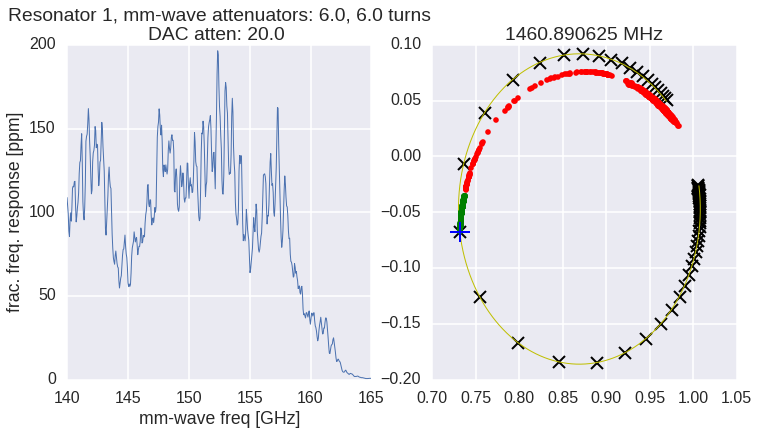

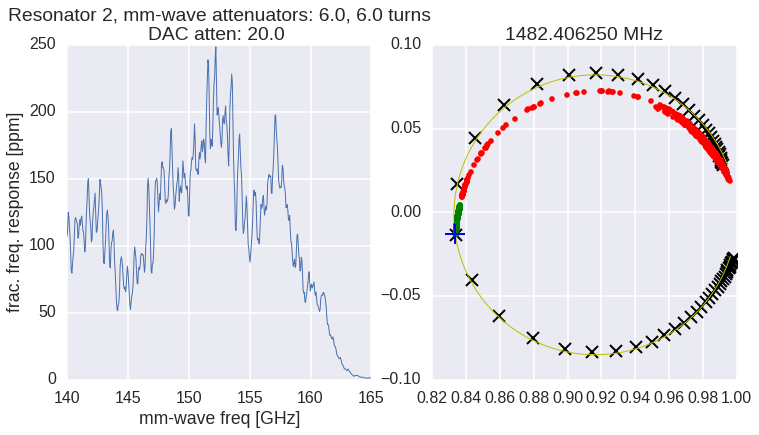

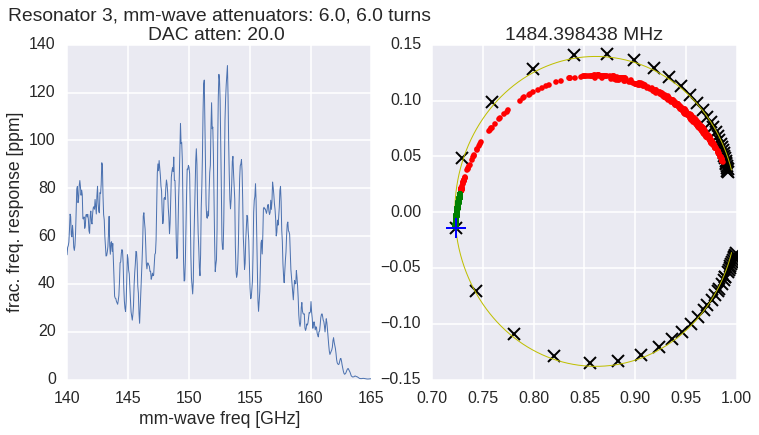

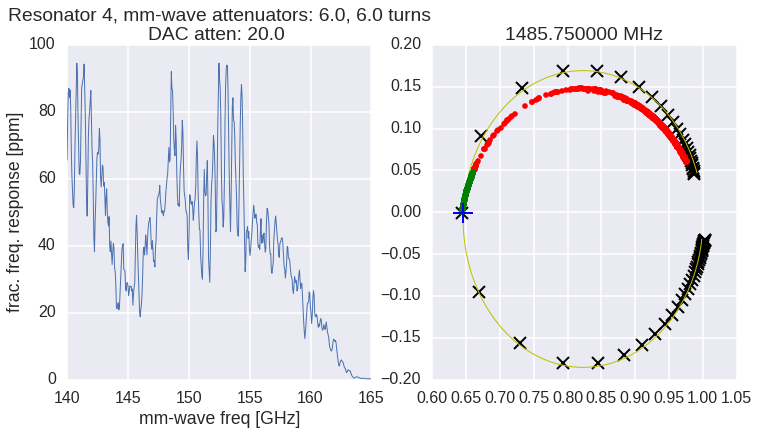

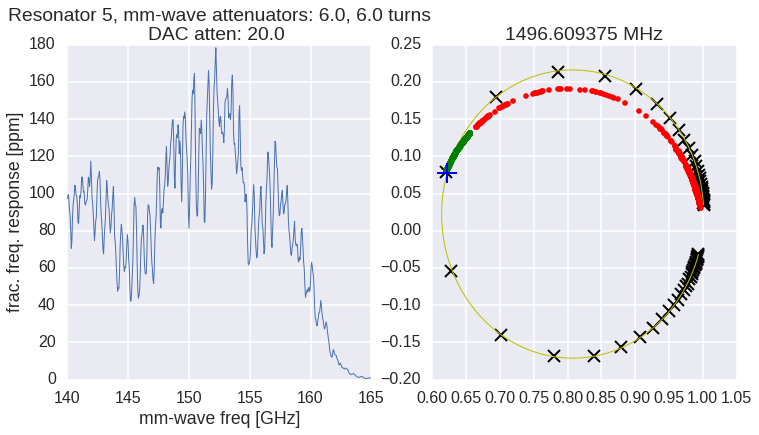

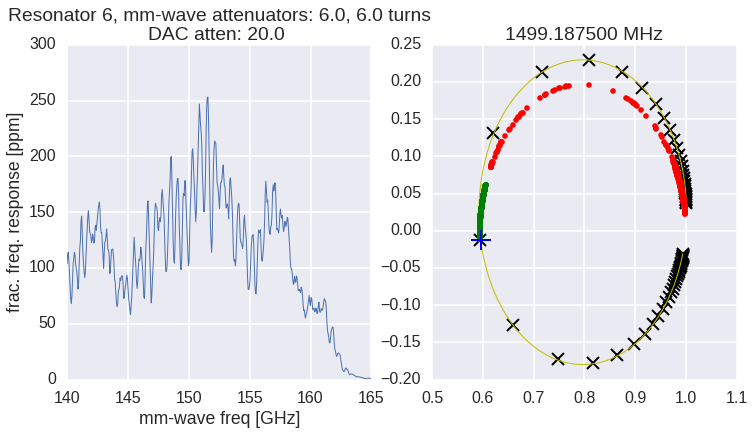

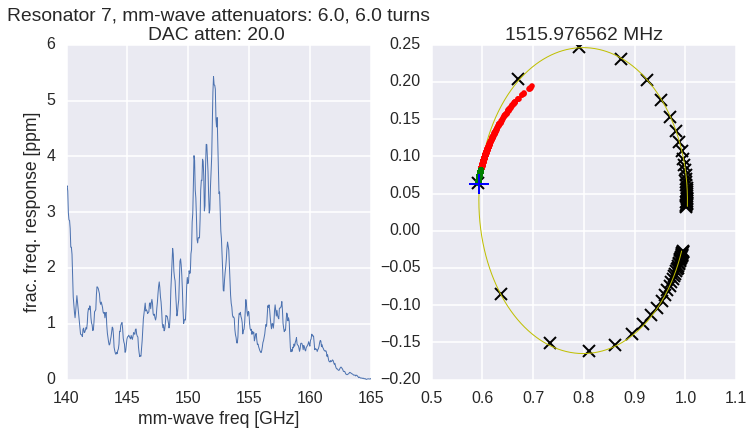

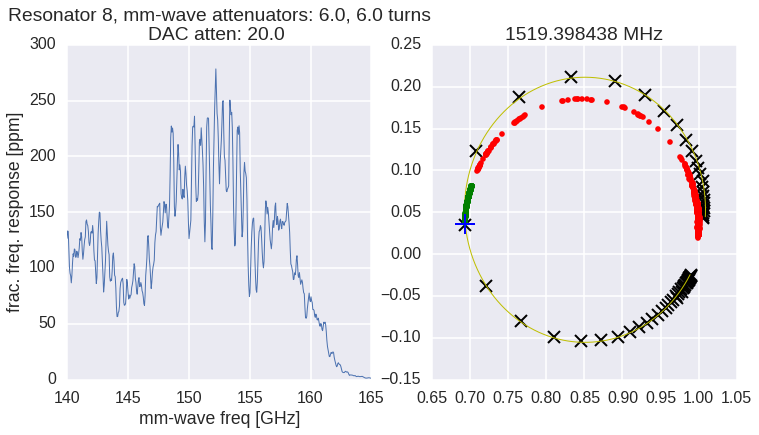

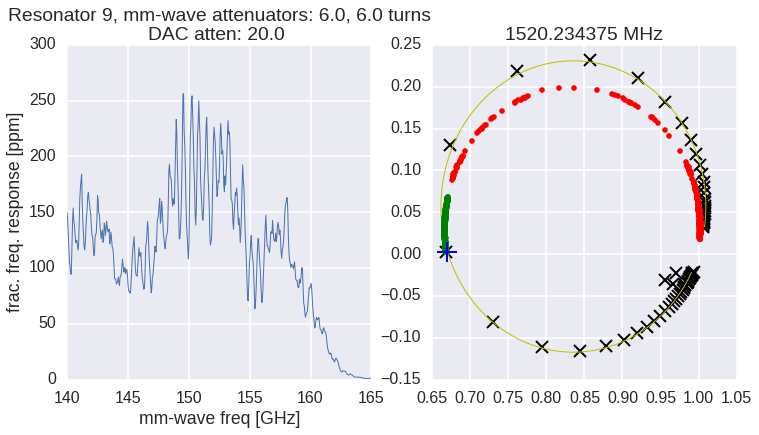

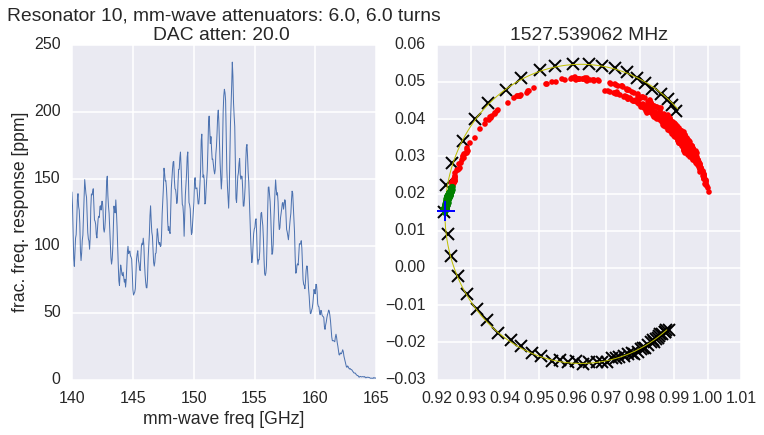

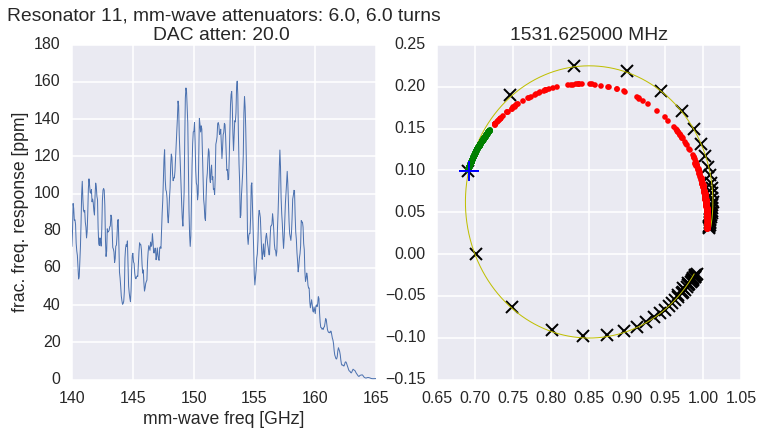

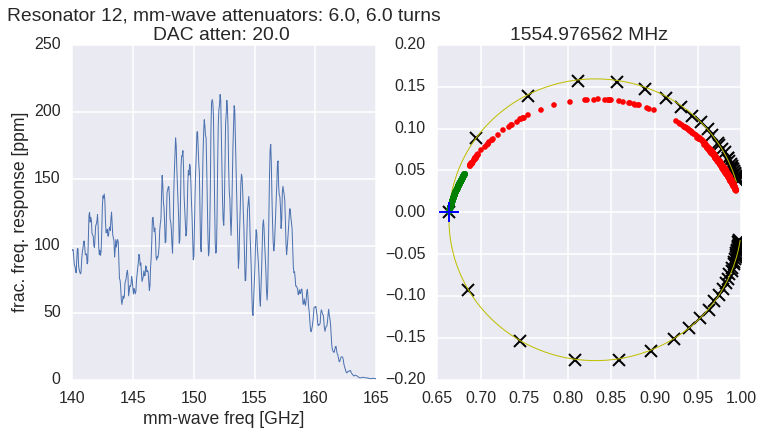

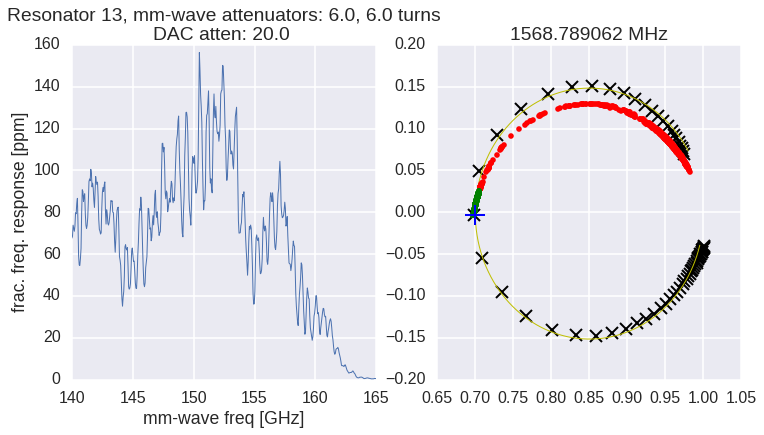

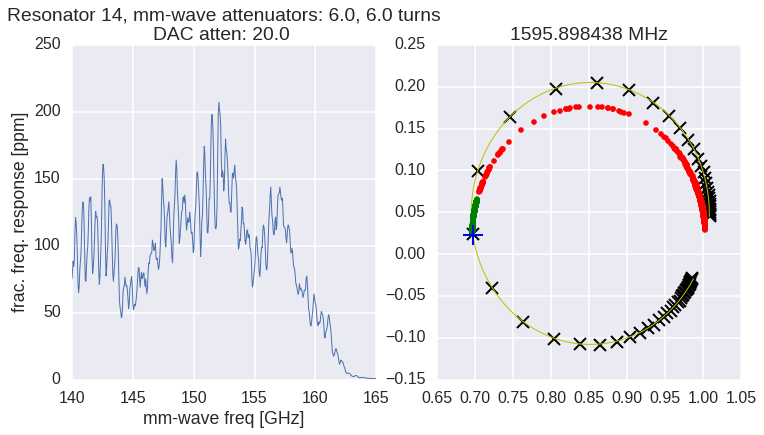

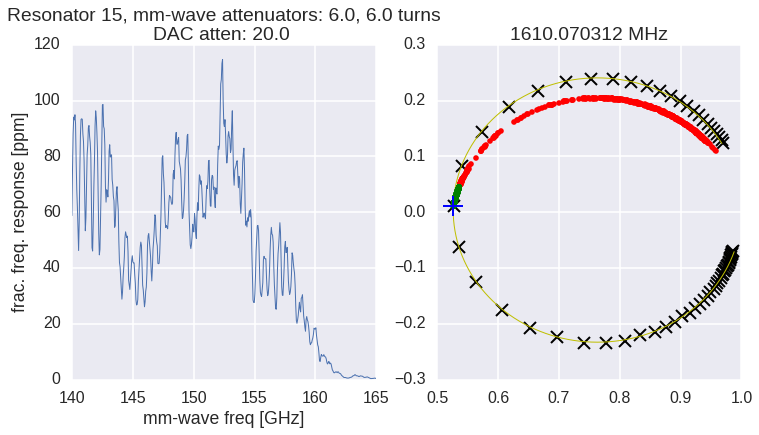

In [13]:
for mmw in mmws:
    blah= mmw.plot()

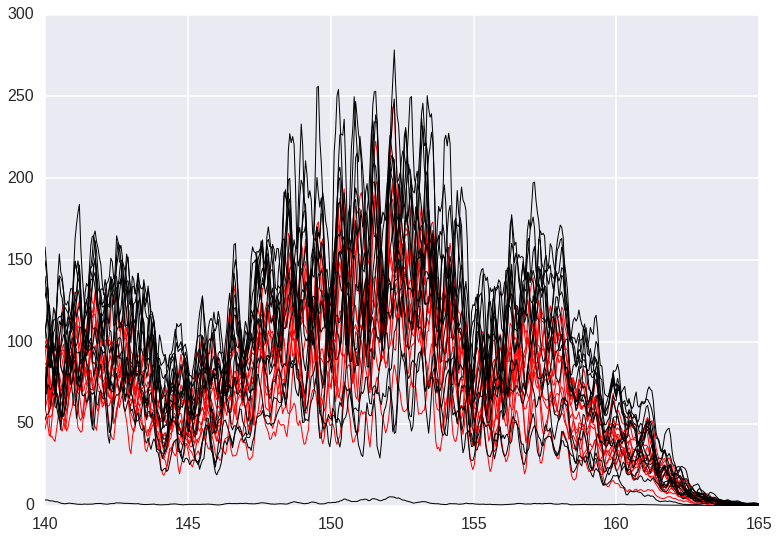

In [29]:
#figure(figsize=(18,6))
for k,mmw in enumerate(mmws):
    if 1200 < mmw.resonator.f_0 <1300:
        continue
    if k < 16:
        color = 'r'
    else:
        color = 'k'
    plot(mmw.mmw_freq/1e9,1e6*mmw.mmw_frac_response/mmws[0].mmw_frac_response,color=color)#/ mmw.zbd_voltage)
#ylim(.1,20)

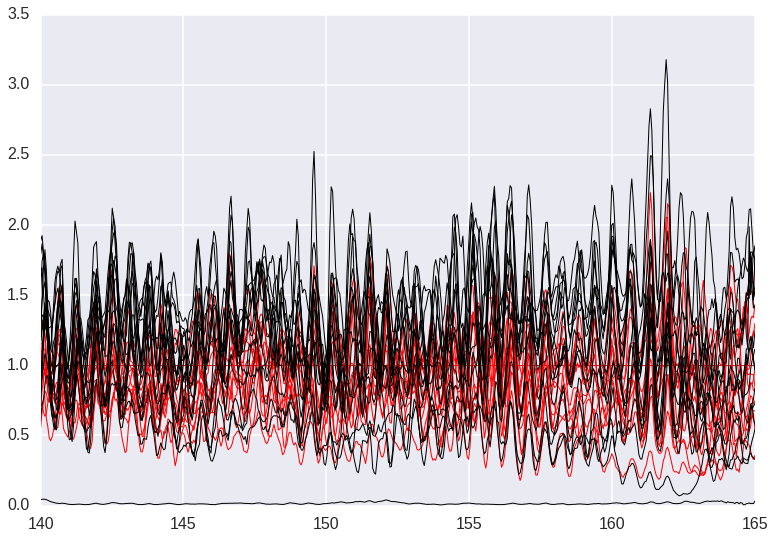

In [31]:
#figure(figsize=(18,6))
for k,mmw in enumerate(mmws):
    if 1200 < mmw.resonator.f_0 <1300:
        continue
    if k < 16:
        color = 'r'
    else:
        color = 'k'
    plot(mmw.mmw_freq/1e9,mmw.mmw_frac_response/mmws[1].mmw_frac_response,color=color)#/ mmw.zbd_voltage)
#ylim(.1,20)

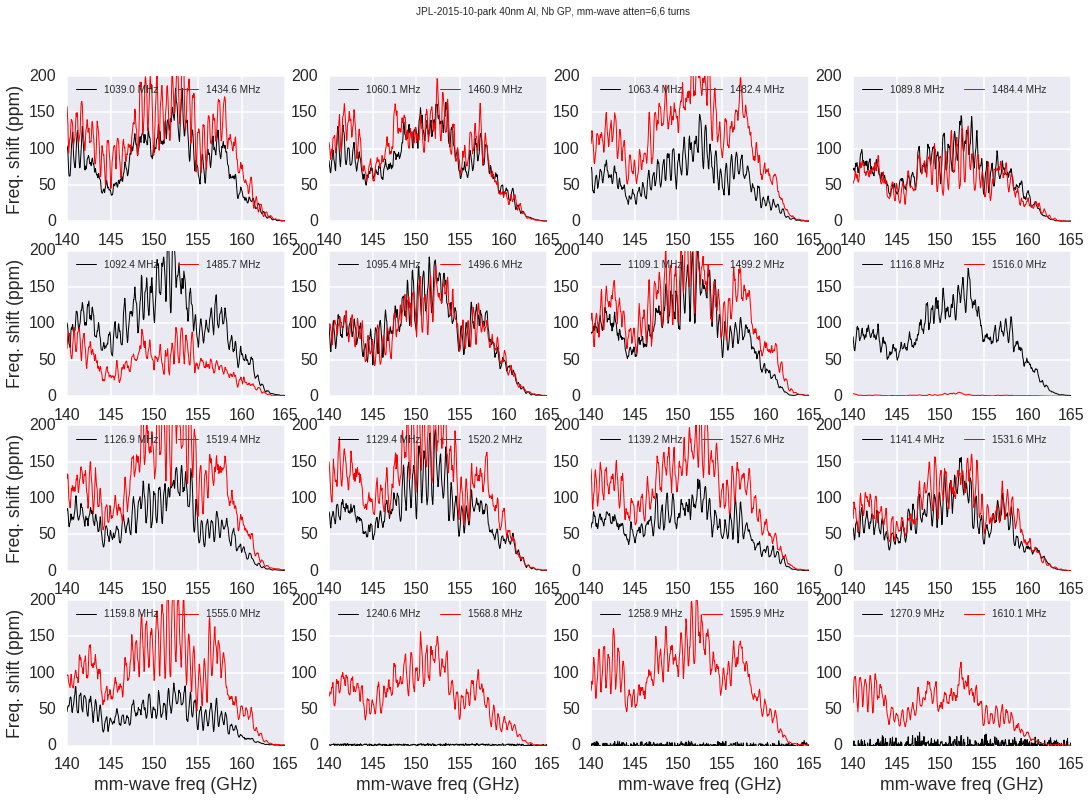

In [34]:
fig,axs = subplots(4,4,figsize=(18,12))
for k in range(16):
    ax = axs.flatten()[k]
    mmw = mmws[k]
    ax.plot(mmw.mmw_freq/1e9,1e6*mmw.mmw_frac_response,'k',label = ("%.1f MHz" % mmw.resonator.f_0))
    mmw = mmws[k+16]
    ax.plot(mmw.mmw_freq/1e9,1e6*mmw.mmw_frac_response,'r',label = ("%.1f MHz" % mmw.resonator.f_0))
    ax.set_ylim(-.1,200)
    ax.legend(loc='upper left',ncol=2,prop=dict(size='medium'))
for k in range(4):
    axs[-1,k].set_xlabel('mm-wave freq (GHz)')
    axs[k,0].set_ylabel('Freq. shift (ppm)')
axs[0,1].set_title('JPL-2015-10-park 40nm Al, Nb GP, mm-wave atten=6,6 turns')
#plt.savefig(plot_dir + ('mmw-response-panels-with-previous.png'),bbox_inches='tight')

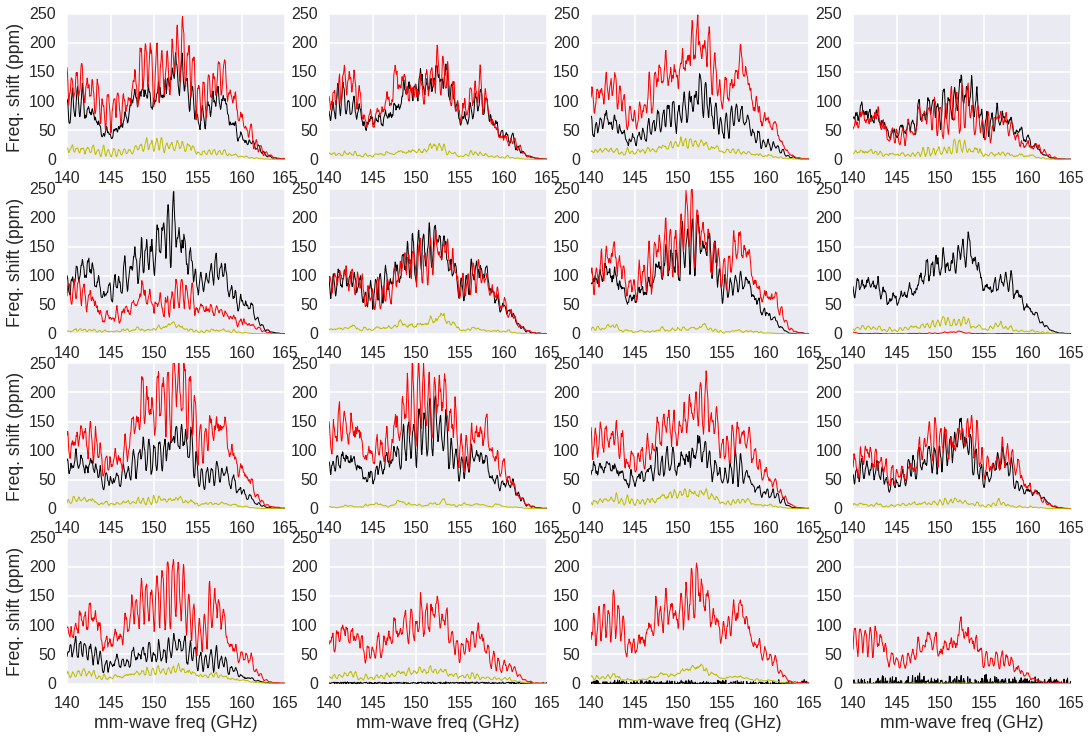

In [51]:
fig,axs = subplots(4,4,figsize=(18,12))
for k in range(16):
    ax = axs.flatten()[k]
    mmw = mmws[k]
    ax.plot(mmw.mmw_freq/1e9,1e6*mmw.mmw_frac_response,'k')
    mmw = mmws[k+16]
    ax.plot(mmw.mmw_freq/1e9,1e6*mmw.mmw_frac_response,'r')
    mmw = mmws_40nm[k]
    ax.plot(mmw.mmw_freq/1e9,1e6*mmw.mmw_frac_response,'y')
    ax.set_ylim(-.1,250)
    #ax.set_yscale('log')
for k in range(4):
    axs[-1,k].set_xlabel('mm-wave freq (GHz)')
    axs[k,0].set_ylabel('Freq. shift (ppm)')
plt.savefig(plot_dir + ('mmw-response-panels-with-previous-at-6-6-turns.png'),bbox_inches='tight')

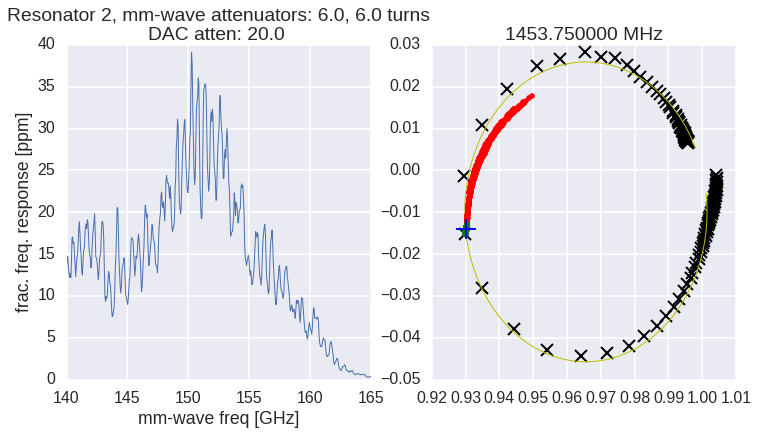

In [42]:
blah = mmws_40nm[2].plot()

In [44]:
mmws_40nm[2].resonator.Q

8983.8165194406138

In [46]:
mmws[2].resonator.Q

32201.49663936019

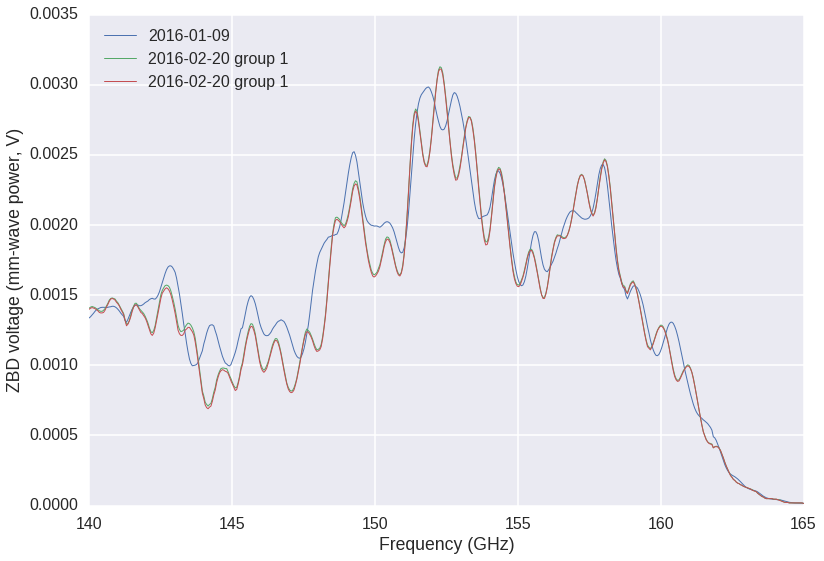

In [54]:
m40 = mmws_40nm[0]
m100 = mmws[0]
m100b = mmws[16]

plot(m40.mmw_freq/1e9,m40.zbd_voltage,label='2016-01-09')
plot(m100.mmw_freq/1e9,m100.zbd_voltage,label='2016-02-20 group 1')
plot(m100b.mmw_freq/1e9,m100b.zbd_voltage,label='2016-02-20 group 1')
legend(loc='upper left')
ylabel('ZBD voltage (mm-wave power, V)')
xlabel('Frequency (GHz)')
plt.savefig(plot_dir + ('zbd-voltage.png'),bbox_inches='tight')

In [16]:
f0s = np.array([mmw.resonator.f_0 for mmw in mmws])
Qs = np.array([mmw.resonator.Q for mmw in mmws])
Qis = np.array([mmw.resonator.Q_i for mmw in mmws])
Qers = np.array([mmw.resonator.Q_e_real for mmw in mmws])

(0, 50000.0)

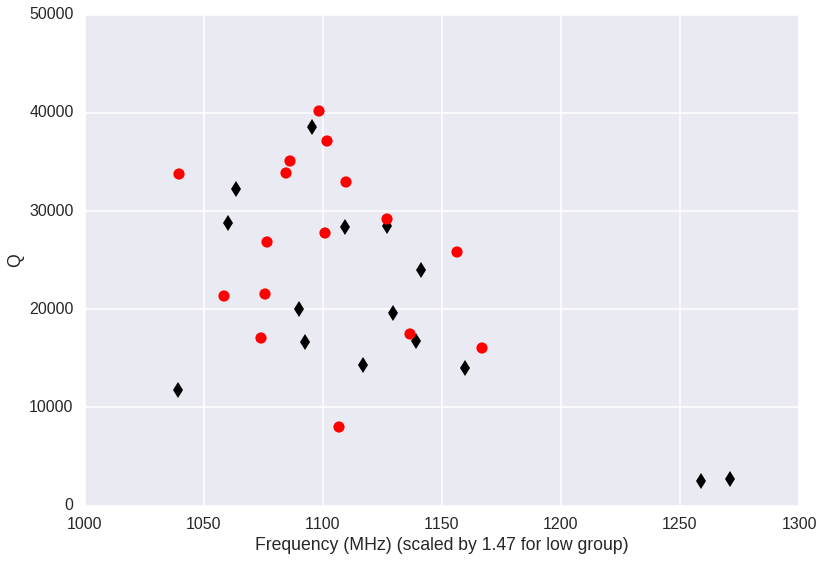

In [47]:
plot(f0s[:16],Qs[:16],'kd')
plot(f0s[16:]/1.38,Qs[16:],'ro')
xlabel('Frequency (MHz) (scaled by 1.47 for low group)')
ylabel('Q')
ylim(0,50e3)

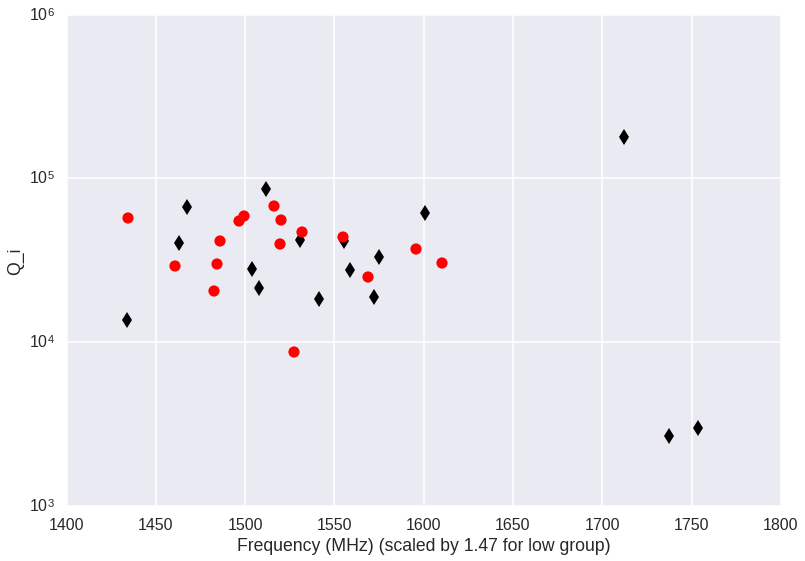

In [25]:
plot(f0s[:16]*1.38,Qis[:16],'kd')
plot(f0s[16:],Qis[16:],'ro')
ylim(1000,1e6)
yscale('log')
xlabel('Frequency (MHz) (scaled by 1.47 for low group)')
ylabel('Q_i')

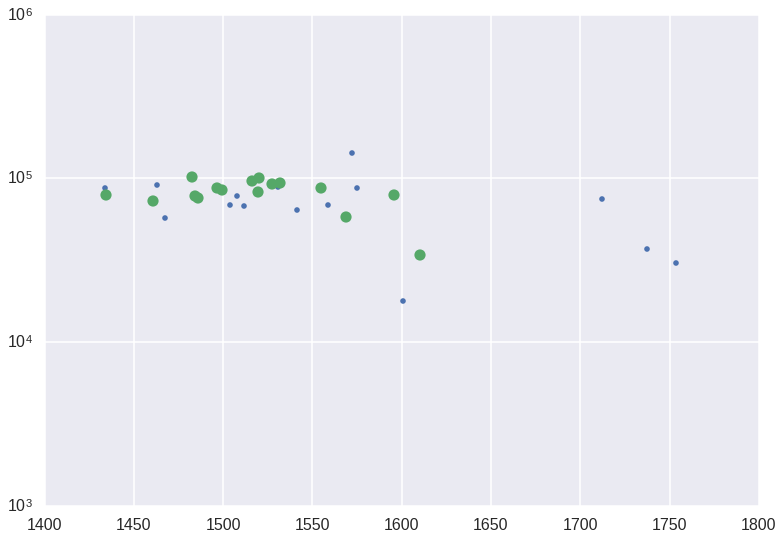

In [26]:
plot(f0s[:16]*1.38,Qers[:16],'.')
plot(f0s[16:],Qers[16:],'o')
ylim(1000,1e6)
yscale('log')